#Data Visualization
Data visualization is the graphical representation of information and data. By using visual elements like charts, graphs, and maps, data visualization tools provide an accessible way to see and understand trends, outliers, and patterns in data.

In the world of Big Data, data visualization tools and technologies are essential to analyze massive amounts of information and make data-driven decisions.

#Our Data - Covid 19


In [ ]:
%%%html
<style>.embed-container {position: relative; padding-bottom: 60%; height: 0; max-width: 80%;} .embed-container iframe, .embed-container object, .embed-container iframe{position: absolute; top: 0; left: 0; width: 100%; height: 100%;} small{position: absolute; z-index: 40; bottom: 0; margin-bottom: -15px;}</style><div class="embed-container"><iframe width="500" height="400" frameborder="0" scrolling="no" marginheight="0" marginwidth="0" title="COVID-19" src="https://www.arcgis.com/apps/opsdashboard/index.html#/bda7594740fd40299423467b48e9ecf6"></iframe></div>


###Background
From Wikipedia,

Coronavirus disease 2019 (COVID-19) is an infectious disease caused by severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2). The disease was first identified in 2019 in Wuhan, China, and has since spread globally, resulting in the 2019–20 coronavirus pandemic. Common symptoms include fever, cough and shortness of breath. Muscle pain, sputum production and sore throat are less common. The rate of deaths per number of diagnosed cases is on average 3.4%, ranging from 0.2% in those less than 20 to approximately 15% in those over 80 years old.



###Datasource
Data Source (Date wise) : 2019 Novel Coronavirus COVID-19 (2019-nCoV) Data Repository by [Johns Hopkins CSSE](https://coronavirus.jhu.edu/map.html)

Data Source: https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_daily_reports/MM-DD-YYYY.csv

File naming convention

MM-DD-YYYY.csv in UTC.


In [ ]:
import pandas as pd


from datetime import date, timedelta
today = date.today()
yesterday = today - timedelta(days=1)
yesterday = yesterday.strftime("%m-%d-%Y")


In [ ]:
orig_covid_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/'+yesterday+'.csv')
orig_covid_df.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2020-11-02 05:25:04,33.93911,67.709953,41501,1536,34326,5639.0,Afghanistan,106.608704,3.701116
1,NaN,NaN,NaN,Albania,2020-11-02 05:25:04,41.15330,20.168300,21202,518,11246,9438.0,Albania,736.743346,2.443166
2,NaN,NaN,NaN,Algeria,2020-11-02 05:25:04,28.03390,1.659600,58272,1973,40395,15904.0,Algeria,132.886235,3.385846
3,NaN,NaN,NaN,Andorra,2020-11-02 05:25:04,42.50630,1.521800,4825,75,3475,1275.0,Andorra,6244.742121,1.554404
4,NaN,NaN,NaN,Angola,2020-11-02 05:25:04,-11.20270,17.873900,11035,286,4920,5829.0,Angola,33.575458,2.591754



###Field description

* Province/State: China - province name; US/Canada/Australia/ - city name, state/province name; Others - name of the event (e.g., "Diamond Princess" cruise ship); other countries - blank.
* Country/Region: country/region name conforming to WHO (will be updated).
* Last Update: *MM/ DD/ YYYY* HH:mm (24 hour format, in UTC).
* Confirmed: the number of confirmed cases. For Hubei Province: from Feb 13 (GMT +8), we report both clinically diagnosed and lab-confirmed cases. For lab-confirmed cases only (Before Feb 17), please refer to who_covid_19_situation_reports. For Italy, diagnosis standard might be changed since Feb 27 to "slow the growth of new case numbers." (Source)
* Deaths: the number of deaths.
* Recovered: the number of recovered cases.

## Remove unneccesary data
For visuality and not to over populate the graphs - lets use only some of the features


In [ ]:
covid_df = orig_covid_df[['Country_Region','Province_State','Confirmed',	'Deaths',	'Recovered', 'Active','Incidence_Rate', 'Case-Fatality_Ratio']]
covid_df.dropna(inplace=True)
covid_df = covid_df[covid_df.Active!=0]
covid_df.sample(5)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Country_Region,Province_State,Confirmed,Deaths,Recovered,Active,Incidence_Rate,Case-Fatality_Ratio
2310,US,Montana,1022,30,0,992.0,9287.531807,2.935421
542,Russia,Smolensk Oblast,8913,237,6379,2297.0,938.854877,2.659037
3376,US,Texas,581,12,0,569.0,2703.331472,2.065404
2084,US,Mississippi,7552,81,0,7471.0,4083.376139,1.072564
958,US,Delaware,3606,121,0,3485.0,1994.623477,3.355519


#Get the libraries
We'll introduce the graphing libraries that set the tone in the Big Data industry.

##About the libraries

**Plotly** graphing library makes interactive, publication-quality graphs.
Go to https://plotly.com/python/ for the complete repertoire of possible features.

**Matplotlib** is a plotting library for the Python programming language and its numerical mathematics extension NumPy. 

**Seaborn** is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

In this notebook you'll find many examples and useful tricks to create a publication quality Big Data and Machine Learning paper.

---


##Import the libraries

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data frame 
#visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

## Scatter and Line Plots

###Basic Scatter Plot

In [ ]:
X = covid_df.Confirmed
Y = covid_df.Deaths

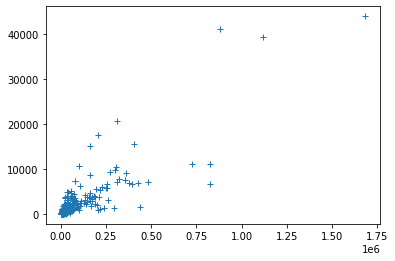

In [ ]:
#matplot lib
plt.plot(X, Y, '+');
plt.show()

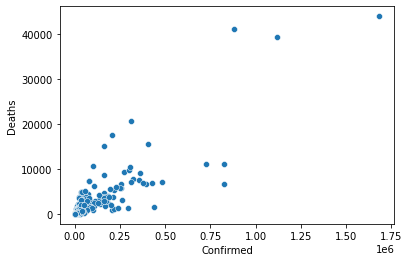

In [ ]:
#sns
sns.scatterplot(x = "Confirmed", y = "Deaths",data=covid_df)
plt.show()

In [ ]:
#plotly express

fig = px.scatter(x=X, y=Y)
fig.update_layout(width=800)
fig.show()

In [ ]:
#Add a trend line
fig = px.scatter(x=covid_df.Confirmed, y= covid_df.Deaths, trendline='ols')
fig.update_layout(width=800)
fig.show()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



###Bubble Scatter Plots
Set size and color with column names

In [ ]:
fig = px.scatter(data_frame=covid_df, x='Confirmed' , y='Deaths', color="Country_Region",
                 size='Case-Fatality_Ratio', hover_data=['Province_State'])
fig.show()

###Line Plot

In [ ]:
#the data
N = 1000
x = np.linspace(0, 1000000, 50)
y = 10000*np.sin(x)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



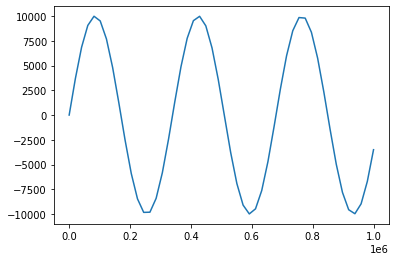

In [ ]:
##seaborn
sns.lineplot(x, y)

###Scatter and line plot with go.Scatter
It is possible to use the more generic go.Scatter class from plotly.graph_objects.

go.Scatter can be used both for plotting points (makers) or lines, depending on the value of mode. The different options of go

In [ ]:
fig = go.Figure(data=go.Scatter(x=x, y=y, mode='markers+lines'))

fig.show()

###Ploting multiple traces
prepare our data

In [ ]:
#Prepare the data - Deaths by Confirmed
dbc = pd.pivot_table(data=covid_df, index=['Confirmed'], values=['Deaths'])
dbc = dbc[dbc.Deaths!=0]
dbc.reset_index(inplace=True)
dbc.head()

,Confirmed,Deaths
0,10,0.166667
1,11,0.666667
2,17,0.166667
3,19,0.750000
4,20,0.500000


In [ ]:

fig.add_trace(go.Scatter(x=x, y=y,
                    mode='lines+markers',
                    name='sinus',
                    marker_color='rgba(255, 182, 193, .9)'
                    ))
fig.add_trace(go.Scatter(x=dbc.Confirmed, y=pd.Series([dbc.Deaths.mean() for i in dbc.Deaths]),
                    mode='lines',
                    name='mean'))
fig.add_trace(go.Scatter(x=dbc.Confirmed, y=dbc.Deaths,
                    mode='markers',
                    marker_line_width=2,
                    marker_size=10,
                    name='death by confirmed'))
fig.update_layout(
    title="Plot Title",
    xaxis_title="X Axis Title",
    yaxis_title="Y Axis Title",
    font=dict(
        family="Courier New, monospace",
        size=14,
        color="RebeccaPurple"
    )
)

fig.show()


##2. Bar Chars

In [ ]:
x=['giraffes', 'orangutans', 'monkeys']
y=[20, 14, 23]


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



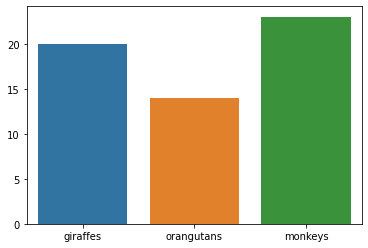

In [ ]:
#sns
sns.barplot(x,y)

Basic Bar Chart with plotly.graph_objects

basic examle

In [ ]:
fig = go.Figure([go.Bar(x=x, y=y)])
fig.show()

Prepare the data

In [ ]:
countries = covid_df.groupby(by='Country_Region')
countries_mean = countries.mean()
countries_mean 

,Confirmed,Deaths,Recovered,Active,Incidence_Rate,Case-Fatality_Ratio
Country_Region,,,,,,
Australia,4542.833333,148.500000,4170.666667,223.666667,76.266780,1.283685
Brazil,205396.481481,5928.666667,186012.518519,13455.296296,3533.830746,2.565652
Canada,21779.272727,929.909091,18244.636364,2604.727273,336.724104,2.564929
Chile,31988.437500,890.375000,30507.312500,590.750000,2612.790427,1.832307
China,929.863636,9.454545,897.863636,22.545455,4.817304,0.761261
Colombia,32811.121212,954.545455,29617.303030,2239.272727,1891.896669,3.031712
Denmark,256.000000,0.000000,253.000000,3.000000,521.469662,0.000000
France,4405.000000,36.888889,2843.555556,1524.555556,1530.241790,0.731903
Germany,34106.437500,658.812500,22721.562500,10726.062500,570.780151,1.851008


In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(x=countries_mean.index, y=countries_mean.Recovered, marker_color='lightsalmon'))
fig.update_layout(
    title='Recovery By Country', 
    yaxis_title = 'Number of cases')
fig.show()

### Grouped Bar Chart
Customize the figure using fig.update.



In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(name='Confirmed', x=countries_mean.index, y=countries_mean.Confirmed, marker_color='lightsalmon'))
fig.add_trace(go.Bar(name='Recovered', x=countries_mean.index, y=countries_mean.Recovered, marker_color='blue'))
fig.update_layout(
    barmode='group',
    title='Confirmed and Recovery By Country', 
    yaxis_title='Number of cases')
fig.show()

###Stacked Bar Chart


In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(name='Recovered', x=countries_mean.index, y=countries_mean.Recovered, marker_color='green'))
fig.add_trace(go.Bar(name='Deaths', x=countries_mean.index, y=countries_mean.Deaths, marker_color='red'))
fig.update_layout(
    barmode='stack',
    title='Deaths and Recovery By Country', 
    yaxis_title='Number of cases')

fig.show()


Many other options available at https://plotly.com/python/bar-charts/

##Pie Charts

In [ ]:
fig = go.Figure()
fig.add_trace(go.Pie(labels=countries_mean.index, values=countries_mean.Recovered))
fig.update_layout(
    height=500,
)
fig.show()

###Donut Chart
Cutomise hole size and add some style

In [ ]:

fig.update_traces(hoverinfo='label+percent', textinfo='label+value', textfont_size=10, hole=0.4,
                  marker=dict(line=dict(color='#000000', width=1)))
fig.update_layout(
    height=800,
    width=600
)
fig.show()

### Pull slices

In [ ]:
fig.update_traces(pull=[0.2 if 'Pakistan' == label else 0 for label in countries_mean.index])
fig.show()

##Histograms

Download example data from plotly. 

In [ ]:
res_df = px.data.tips()
res_df.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
res_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [ ]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=res_df.total_bill))
fig.update_layout(
    width=1000
)
fig.show()

In [ ]:
fig.update_traces(nbinsx=50)
fig.update_layout(
    width=1000
)
fig.show()

###Horizontal Histogram


In [ ]:
fig = go.Figure()
fig.add_trace(go.Histogram(y=res_df.total_bill))
fig.update_layout(
    height=800,
    width=800,
    bargap=0.2
)
fig.show()

###Overlaid Histogram



In [ ]:

fig = go.Figure()
fig.add_trace(go.Histogram(x = res_df.total_bill - res_df.tip, marker_color='#330C73'))
fig.add_trace(go.Histogram(x=res_df.total_bill, marker_color='#EB89B5'))

# Overlay both histograms
fig.update_layout(barmode='overlay', bargap=0.2)
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.75)
fig.show()

###Heat Maps (Histagram2D)


In [ ]:
fig = go.Figure(go.Histogram2d(
        x=res_df.total_bill,
        y=res_df.tip
    ))
fig.update_layout(
    width=600
)
fig.show()

Plotting a corelation matrix heatmap

In [ ]:
fig = go.Figure(data=go.Heatmap(
                   z=[[1, None, 30, 50, 1], [20, 1, 60, 80, 30], [30, 60, 1, -10, 20]],
                   x=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'],
                   y=['Morning', 'Afternoon', 'Evening'],
                   hoverongaps = False))
fig.update_layout(
    width=600
)
fig.show()

## Box Plot

In [ ]:
fig = go.Figure()
fig.add_trace(go.Box(name='Total bill', y=res_df.total_bill, boxmean=True))
fig.update_layout(
    width=600
)
fig.show()

###Styling Outliers

In [ ]:
fig = go.Figure()
fig.add_trace(go.Box(name='Total bill', y=res_df.total_bill, boxmean='sd'))

fig.update_traces(
    marker=dict(
        color='rgb(8,81,156)',
        outliercolor='rgba(219, 64, 82, 0.6)',
        line=dict(
            outliercolor='rgba(219, 64, 82, 0.6)',
            outlierwidth=2)),
    line_color='rgb(8,81,156)'
)
fig.update_layout(
    width=600
)
fig.show()

##Violin Plots


In [ ]:
fig = go.Figure(data=go.Violin(y=res_df['total_bill'], box_visible=True, line_color='black',
                               meanline_visible=True, fillcolor='green', opacity=0.6,
                               x0='Total Bill'))

fig.update_layout(yaxis_zeroline=False,
                  width=600)
fig.show()

##Scatter Matrix (Pair plot /splom-scatter plot matrix)
Diabetes dataset is downloaded from kaggle. It is used to predict the onset of diabetes based on 8 diagnostic measures. The diabetes file contains the diagnostic measures for 768 patients, that are labeled as non-diabetic (Outcome=0), respectively diabetic (Outcome=1). The splom associated to the 8 variables can illustrate the strength of the relationship between pairs of measures for diabetic/nondiabetic patients.



In [ ]:
diab_df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv')
diab_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
diab_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


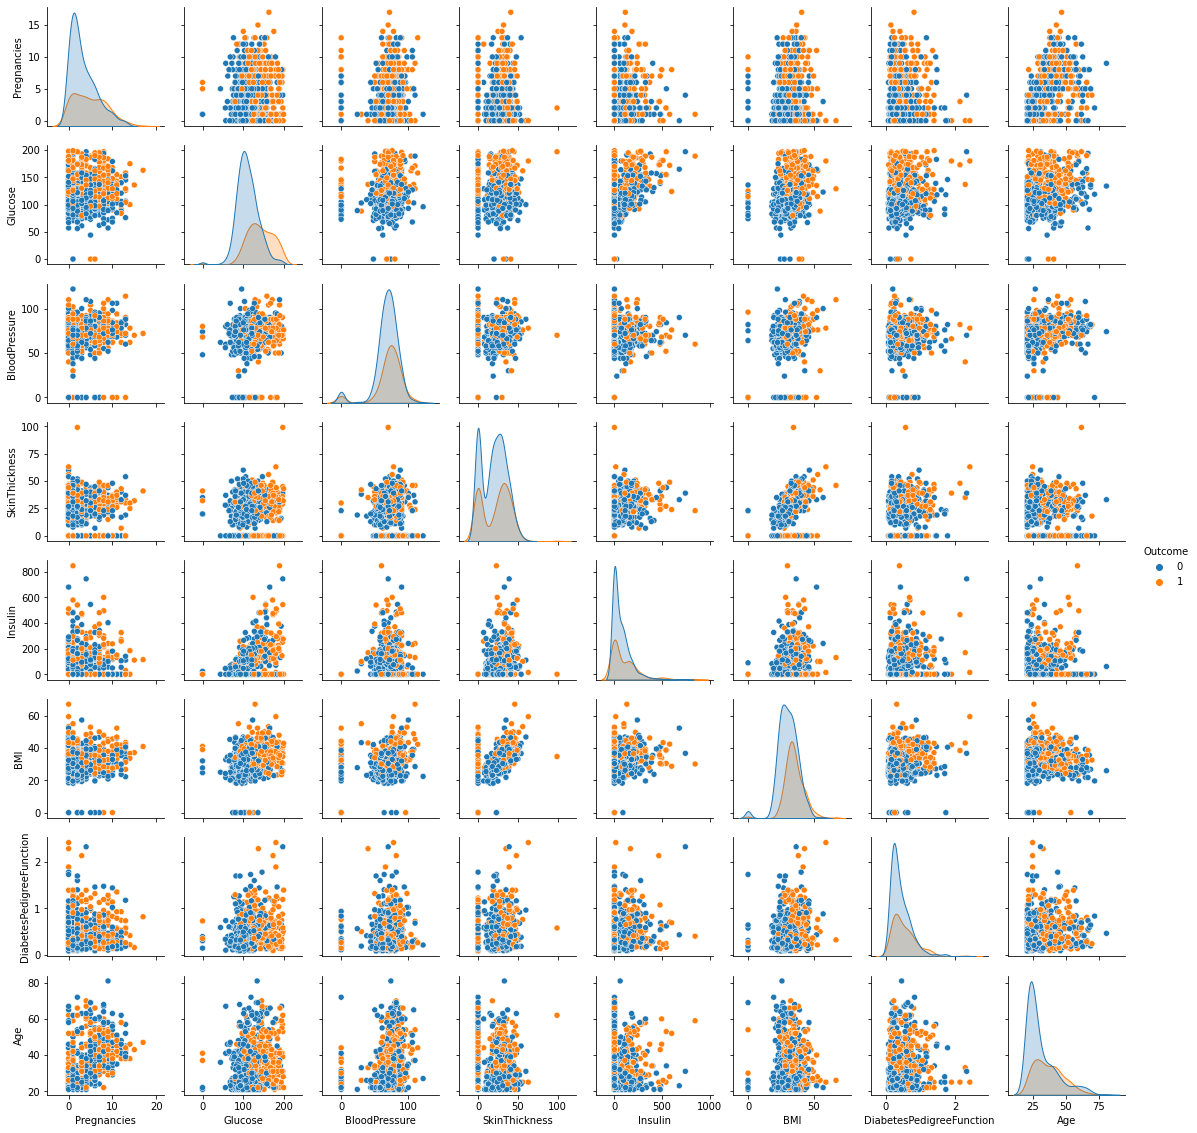

In [ ]:
#sns
import seaborn as sns
sns.pairplot(diab_df, hue='Outcome',height=2)

prepare the data you want to plot with pyplot

In [ ]:
dimensions = [dict(label=x, values=diab_df[x]) for x in diab_df.columns if x != 'Outcome']


Plot it

In [ ]:
fig = go.Figure()
fig.add_trace(go.Splom(dimensions=dimensions))
fig.show()

In [ ]:
fig.update_traces(marker=dict(color=diab_df['Outcome'],
                              size=5,
                              colorscale='Bluered',
                              line=dict(width=0.5,
                                        color='rgb(230,230,230)')),
                  text=['non-diabetic' if outcome==0 else 'diabetic' for outcome in diab_df['Outcome']],
                  diagonal=dict(visible=True)
)

fig.show()


In [ ]:
title = "Scatterplot Matrix (SPLOM) for Diabetes Dataset<br>Data source:"+\
        " <a href='https://www.kaggle.com/uciml/pima-indians-diabetes-database/data'>link</a>"
fig.update_layout(title=title,
                  dragmode='select',
                  width=1000,
                  height=1000,
                  hovermode='closest',
                  font=dict(
                  family="monospace",
                  size=8,
                  color="black"
    )
                  )

fig.show()

##Sub-Plots


In [ ]:
from plotly.subplots import make_subplots

fig = make_subplots(rows=1, cols=2)

fig.add_trace(
    go.Scatter(x=diab_df.BMI, y=diab_df.Age, mode='markers'),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=[20, 30, 40], y=[50, 60, 70]),
    row=1, col=2
)
# Update xaxis properties
fig.update_xaxes(title_text="xaxis 1 title", showgrid=False, row=1, col=1)
fig.update_xaxes(title_text="xaxis 2 title", range=[10, 50], row=1, col=2)

# Update yaxis properties
fig.update_yaxes(title_text="yaxis 1 title", row=1, col=1)
fig.update_yaxes(title_text="yaxis 2 title", range=[40, 80], row=1, col=2)

fig.update_layout(height=800, width=800, title_text="Side By Side Subplots")
fig.show()


### Subplots with Shared X-Axes


In [ ]:
fig = make_subplots(rows=3, cols=1, 
                    shared_xaxes=True, 
                    vertical_spacing=0.02)

fig.add_trace(go.Scatter(x=[0, 1, 2], y=[10, 11, 12]),
              row=3, col=1)

fig.add_trace(go.Scatter(x=[2, 3, 4], y=[100, 110, 120]),
              row=2, col=1)

fig.add_trace(go.Scatter(x=[3, 4, 5], y=[1000, 1100, 1200]),
              row=1, col=1)

fig.update_layout(height=600, width=600,
                  title_text="Stacked Subplots with Shared X-Axes")
fig.show()

###Custom Sized Subplot with Subplot Titles

In [ ]:

fig = make_subplots(
    rows=2, cols=2,
    specs=[
           [{}, {}],
           [{"colspan": 2}, {}]
           ],
    subplot_titles=("First Subplot","Second Subplot", "Third Subplot"))

fig.add_trace(go.Scatter(x=[1, 2], y=[1, 2]),
                 row=1, col=1)

fig.add_trace(go.Scatter(x=[1, 2], y=[1, 2]),
                 row=1, col=2)
fig.add_trace(go.Scatter(x=[1, 2, 3], y=[2, 1, 2]),
                 row=2, col=1)

fig.update_layout(showlegend=False, title_text="Specs with Subplot Title")
fig.show()